<a href="https://colab.research.google.com/github/ArnavGhosh999/CODSOFT--Task1/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_filename = '/content/Churn_Modelling.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

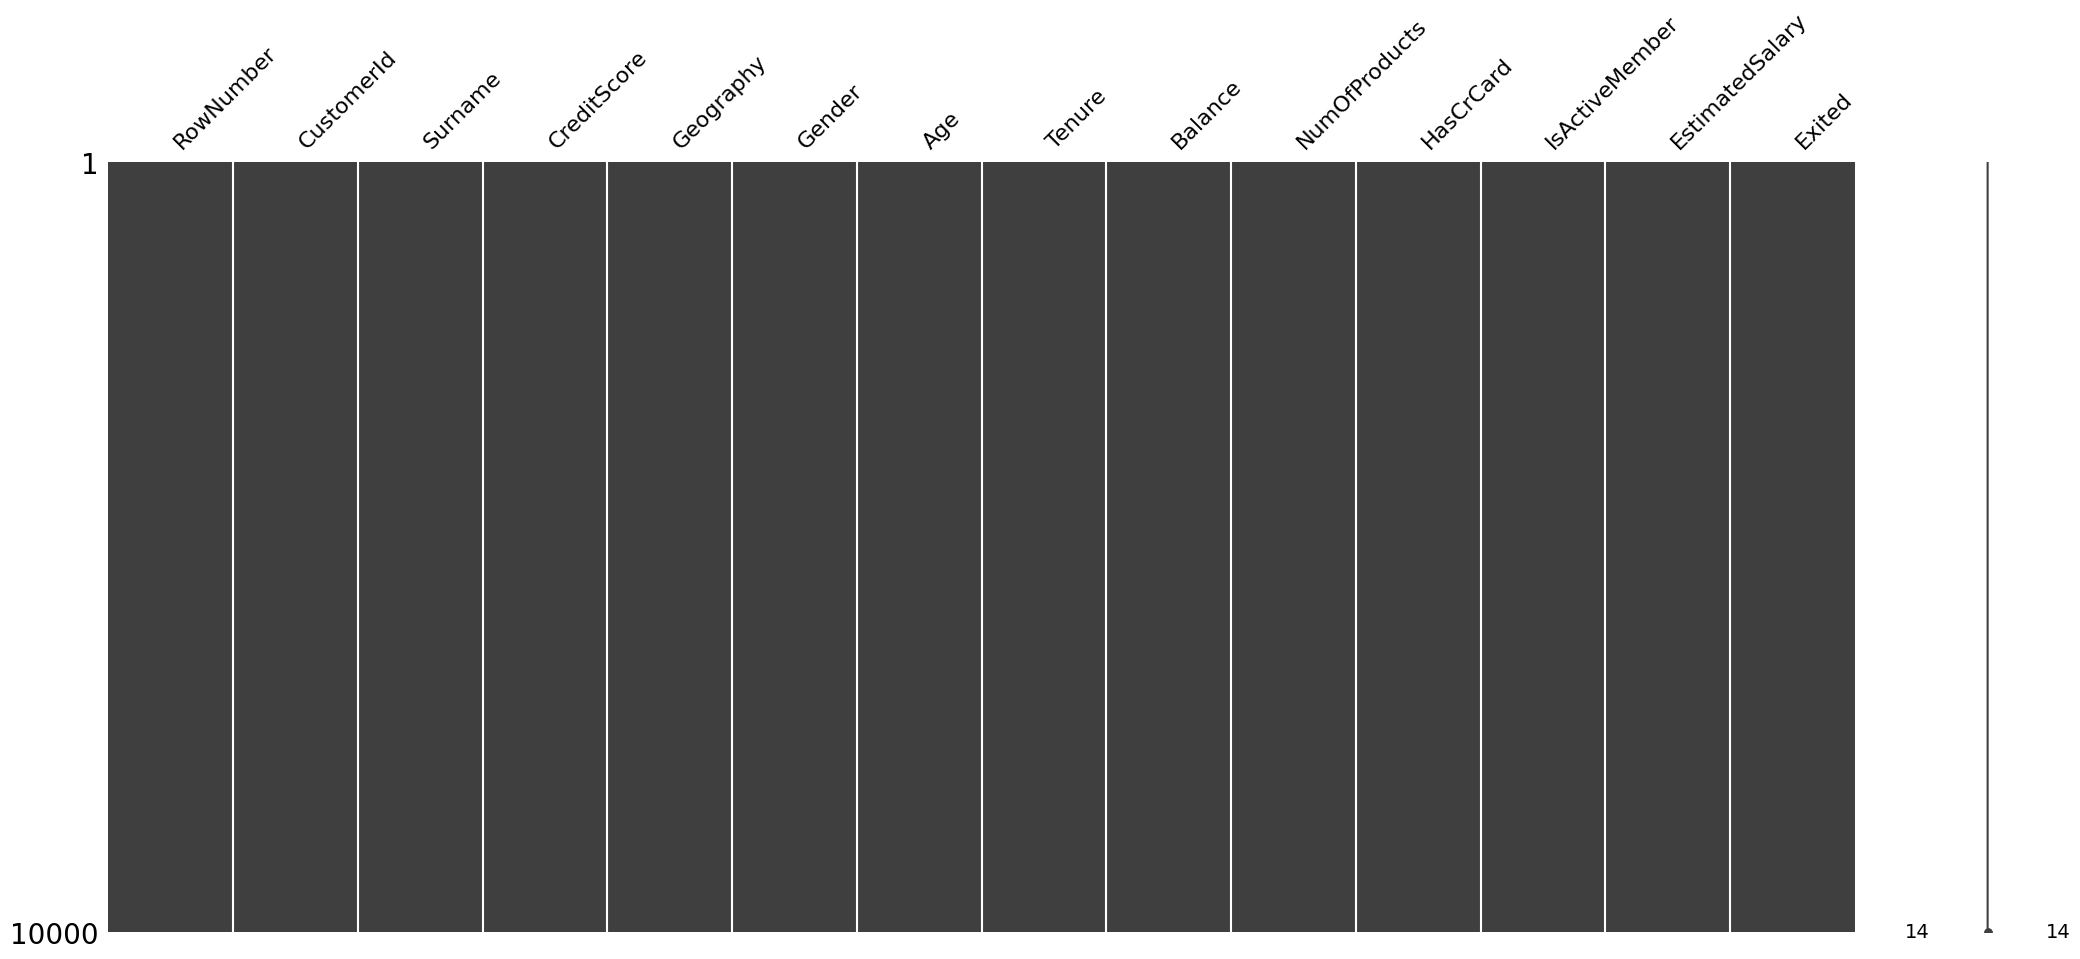

In [ ]:
msno.matrix(df);

In [ ]:
df.head(100)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15699461,Fiorentini,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
96,97,15738721,Graham,773,Spain,Male,41,9,102827.44,1,0,1,64595.25,0
97,98,15693683,Yuille,814,Germany,Male,29,8,97086.40,2,1,1,197276.13,0
98,99,15604348,Allard,710,Spain,Male,22,8,0.00,2,0,0,99645.04,0


In [ ]:
df.tail(100)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9900,9901,15645896,Duncan,646,Germany,Male,39,6,121681.91,2,0,1,61793.47,0
9901,9902,15802909,Hu,706,Germany,Female,56,3,139603.22,1,1,1,86383.61,0
9902,9903,15797665,Docherty,730,France,Female,27,7,0.00,2,1,0,144099.48,0
9903,9904,15778959,Brookes,606,France,Female,36,10,0.00,2,0,1,155641.46,0
9904,9905,15722532,Angelo,690,Spain,Female,36,10,91760.11,1,1,1,135784.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

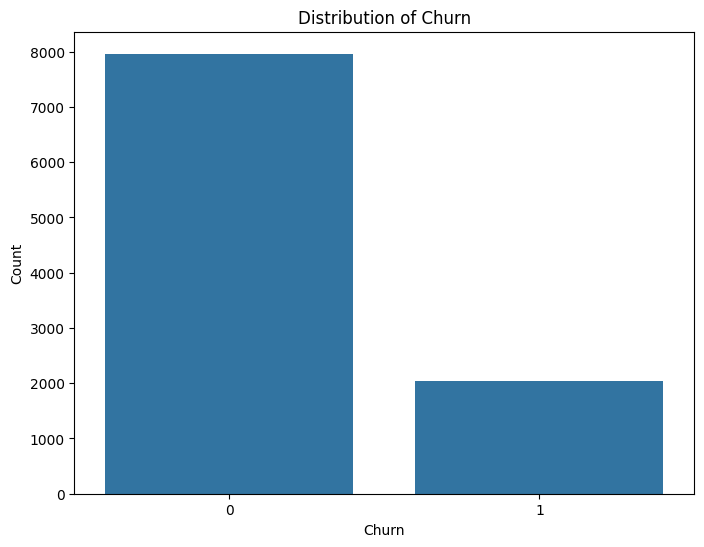

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

<ipython-input-18-0cd2622bc536>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


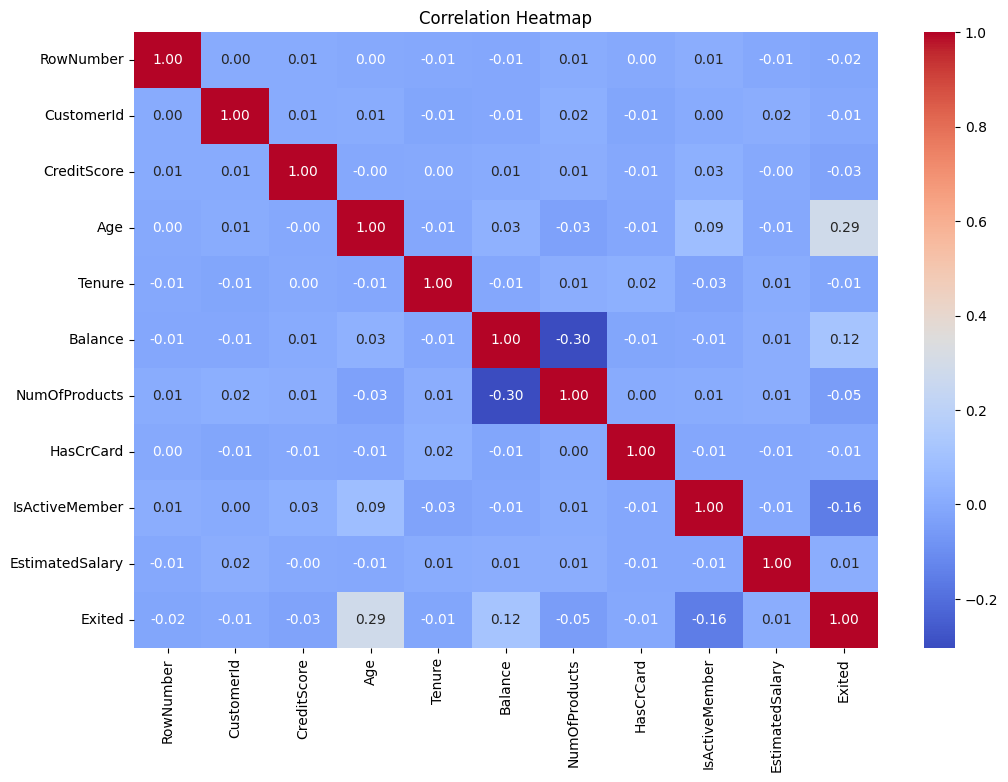

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
for i in df.columns[0:-1]:
  print(f'Number of categories in the variable {i}: {len(df[i].unique())}')

Number of categories in the variable RowNumber: 10000
Number of categories in the variable CustomerId: 10000
Number of categories in the variable Surname: 2932
Number of categories in the variable CreditScore: 460
Number of categories in the variable Geography: 3
Number of categories in the variable Gender: 2
Number of categories in the variable Age: 70
Number of categories in the variable Tenure: 11
Number of categories in the variable Balance: 6382
Number of categories in the variable NumOfProducts: 4
Number of categories in the variable HasCrCard: 2
Number of categories in the variable IsActiveMember: 2
Number of categories in the variable EstimatedSalary: 9999


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df[df['Gender']=='Male'][['Surname', 'IsActiveMember']].value_counts()


Surname   IsActiveMember
Thompson  0                 13
Scott     1                 12
Yeh       1                 12
Maclean   1                 11
Martin    1                 11
                            ..
Hoolan    0                  1
Hooker    1                  1
Honore    1                  1
Holt      1                  1
Zuyeva    1                  1
Length: 2857, dtype: int64

In [ ]:
(df[df['Exited'] == 1].shape[0]/df.shape[0])*100

20.369999999999997

###From this we get to know that 20.36% or roughly 21% of our data is showing churned.

In [ ]:
churn = df['Exited'].value_counts().reset_index()
churn.head()

,index,Exited
0,0,7963
1,1,2037


Text(0, 0.5, 'EXITED (churned)')

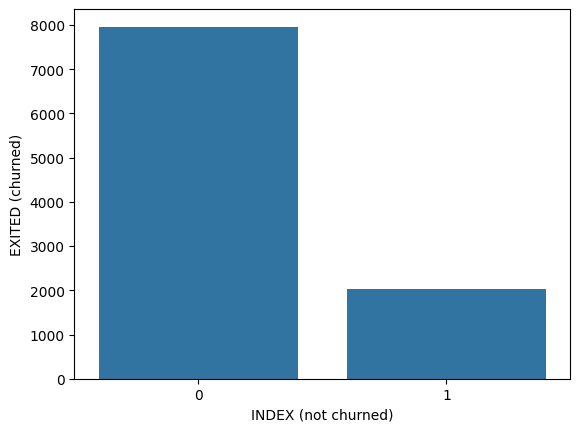

In [ ]:
sns.barplot(x= churn['index'], y= churn['Exited'])
plt.xlabel('INDEX (not churned)')
plt.ylabel('EXITED (churned)')

<Axes: xlabel='Tenure', ylabel='Density'>

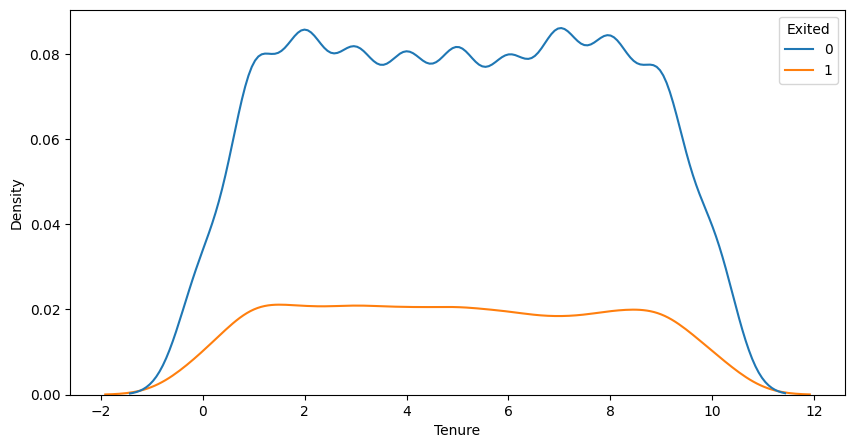

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(x= df['Tenure'], hue=df['Exited'])

From this graph we can make out that lesser the tenure more will be the chances of getting churned

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Text(0.5, 0, 'GENDER')

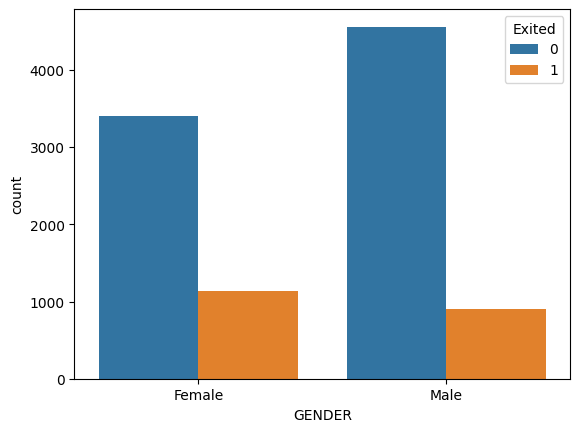

In [ ]:
sns.countplot(x=df['Gender'], hue=df['Exited'])
plt.xlabel('GENDER')


##Female customers have churned more than male customers

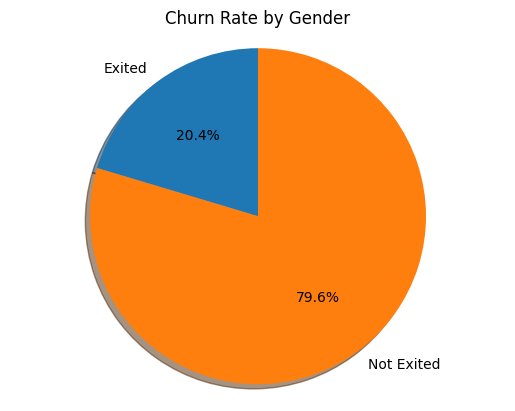

In [ ]:
labels = 'Exited', 'Not Exited'
sizes = [df[df['Exited'] == 1].shape[0], df[df['Exited'] == 0].shape[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Churn Rate by Gender')
plt.show()

In [ ]:
stats = churn['HasCrCard'].value_counts().reset_index()
stats.head()

,index,HasCrCard
0,1,1424
1,0,613


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
print("Logistic Regression Precision:", lr_precision*100.0,"%")
print("Logistic Regression Recall:", lr_recall*100.0,"%")
print("Logistic Regression F1-score:", lr_f1*100.0,"%")
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print("\nRandom Forest Precision:", rf_precision*100.0,"%")
print("Random Forest Recall:", rf_recall*100.0,"%")
print("Random Forest F1-score:", rf_f1*100.0,"%")
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
print("\nGradient Boosting Precision:", gb_precision*100.0,"%")
print("Gradient Boosting Recall:", gb_recall*100.0,"%")
print("Gradient Boosting F1-score:", gb_f1*100.0,"%")

Logistic Regression Precision: 55.24475524475524 %
Logistic Regression Recall: 20.10178117048346 %
Logistic Regression F1-score: 29.47761194029851 %

Random Forest Precision: 75.81967213114754 %
Random Forest Recall: 47.07379134860051 %
Random Forest F1-score: 58.08477237048666 %

Gradient Boosting Precision: 75.0 %
Gradient Boosting Recall: 48.854961832061065 %
Gradient Boosting F1-score: 59.16795069337443 %


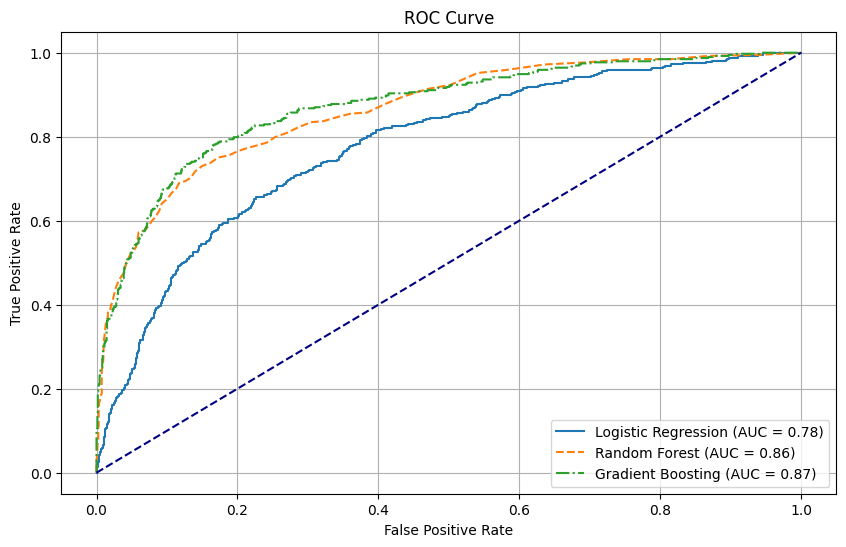

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]  # Logistic Regression
rf_probs = rf_model.predict_proba(X_test)[:, 1]        # Random Forest
gb_probs = gb_model.predict_proba(X_test)[:, 1]        # Gradient Boosting
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, linestyle='--', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, linestyle='-.', label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()